# COMPSCI 389: Homework 3 Solutions

## Part 1: Short Answer

Answer the following questions with at least a few sentences, and no more than roughly one page of text.

#### 1. [10 points] Consider the plot created by the python code below. How many local minima does this function have? How many global minima? Roughly where are they (rough visual estimates from the plot are sufficient).

Note: The function is 
$$
f(x)=x^6 - 15x^5 + 85x^4 - 225x^3 + 274x^2 - 130x.
$$

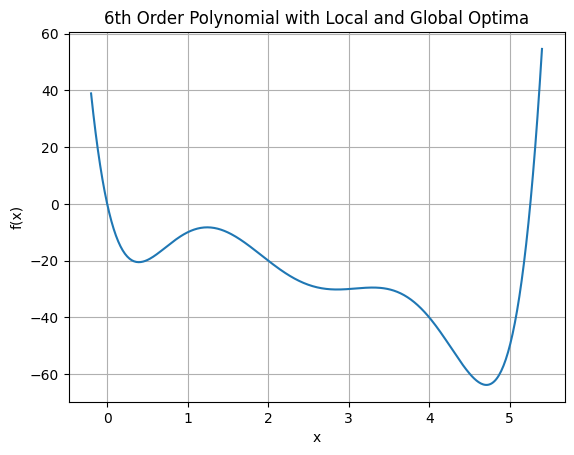

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the 6th order polynomial function
def polynomial(x):
    # Example of a 6th order polynomial
    return x**6 - 15*x**5 + 85*x**4 - 225*x**3 + 274*x**2 - 130*x

# Generate a range of x values
x = np.linspace(-0.2, 5.4, 400)

# Compute y values
y = polynomial(x)

# Plotting the function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


***Answer***

<font color="blue">

There are three local minima and one global minimum.  Local minima occur where all nearby values of $x$ have higher function values. The local minima are at approximately $0.4$, $2.9$, and $4.7$. The global minimum, which is the lowest point of the entire function, is also at approximately $4.7$. Notice that the global minimum is also a local minimum!

</font>

---

***Updated Answer***

<font color="Green">State whether or not you included the global minimum in your list of local minima (it **is** a local minimum too!).</font>

---

#### 2. [10 points] Is the use of one hot encodings more important for nominal or ordinal features? Why?

***Answer***

<font color="white">

Recall that without a one hot encoding, categorical features are typically mapped to integers. When used with parametric models, the ordering of the integers implies an ordering on the categorical values. A one hot encoding treats each category as equally distant and distinct. This is particularly important for nominal features that have no natural ordering. While one hot encodings can still be useful with ordinal features, the ordering of ordinal features provides a reasonable ordering for the mapping to integer values.

</font>

---

***Updated Answer***

<font color="Green">

Ensure that you answer explained "why". If your initial answer already did, then you do not need to enter anything in the updated answer for this question.

</font>

---

#### 3. [10 points] Recall that in lecture we ran gradient descent on the least squares loss for the GPA data set (as a regression problem). We observed that we had to use extremely small step sizes for gradient descent to not cause the model parameters to diverge. Why was this? How did we fix this?

***Initial Answer***

<font color="white">

The features were not normalized, and so they ranged from zero to to 800. Furthermore, we used a polynomial basis that included the products of features, which could range from 0 to 640,000. Recall that the feature value, $\phi_j(X_i)$ appears in the expression for the gradient of the mean squared error with respect to the parameters of a linear parametric model. Hence, the gradient will have a similar scale---very large. This results in large steps during gradient descent that overshoot the minimum, resulting in larger losses each iteration.

This problem is exascerbated by the fact that the labels are relatively small (on the order of 0-4), and so the optimal weights are very small (recall that these weights are multiplied by the large feature values). So, not only is the gradient particularly large, but very small changes to the weights can result in relatively large changes in the predicted labels.

We resolved this by using an adaptive step size and by normalizing (standardizing) the features before using gradient descent. The adaptive step size is able to determine that smaller step sizes are necessary for this problem, while feature normalization (standardization) rescales the features to be of more reasonable magnitudes.

</font>

---

***Updated Answer***

<font color="Green">

Ensure that your answer included:
1. The poor scale of features.
2. The reason why this poor scaling of features resulted in divergence (large gradients).
3. The large gradient means that the algorithm takes large steps (and also that small steps result in large changes to the predicted labels, although it's ok if your answer omits this latter point).
4. The solution involved normalizing or standardizing the features.
5. Your answer does not need to mention the use of adaptive step sizes.

If your answer missed any of these points, include the missed points (in your own words) in the updated answer.

</font>

---

#### 4. [10 points] You are working on a machine learning project to predict the sale prices of houses in a city. The data set includes features such as the number of bedrooms, number of bathrooms, square footage, and the age of the house. However, you notice that many entries in the 'number of bathrooms' column are missing.

A) Explain the potential bias that could result from simply discarding rows with missing 'number of bathrooms' data when predicting house prices.

B) As an alternative to discarding these rows, propose a method to handle these missing values (you may describe one that we covered in lecture). 

***Answer***

<font color="white">

A) There are many possible answers to this question. The key is to highlight that the rows can be correlated with the sale prices of houses in the city, and so omitting these rows could bias the data. For example, if the number of bathrooms is primarily omitted for less expensive houses, the model will tend to over-predict the sale prices of homes. To make this clear, consider what happens if all homes under $350,000 did not list the number of bathrooms. The model would likely never predict a value below $350,000!

B) Again, there are several reasonable answers. The most straightfoward is to use imputation methods that estimate the missing values from other information. For example, the median number of bathrooms could be used for the missing bathroom number, or the number of bathrooms from the nearest neighbor in the data set could be used.

</font>

---

***Updated Answer***

<font color="Green">

Ensure that for question (A) you highlighted that the rows with missing bathrooms may not be uniformly randomly distributed, but rather than whether or not a row is missing this value may be correlated with other values (particularly the label).

For question (B), if your answer did not relate to value imputation, describe how your proposed method compares to value imputation.

</font>

---

#### 5. [5 points] Consider the artificial neural network architecture described by the following code. How many hidden layers does this network have?

```
class Question4Network(nn.Module):
    def __init__(self, num_classes):
        super(FeedforwardNeuralNetModel, self).__init__()
        
        self.fc0 = nn.Linear(9, 10) 
        self.fc1 = nn.Linear(hidden_size, 10) 
        self.fc2 = nn.Linear(hidden_size, 10)
        self.fc3 = nn.Linear(hidden_size, 1)  

    def forward(self, x):
        out = F.relu(self.fc0(x))
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out
```

***Answer***

<font color="white">

This network has three hidden layers, fc0, fc1, and fc2. The layer fc3 is the output layer.

</font>

---

***Updated Answer***

<font color="Green">

If your answer was not 3, comment on why you thought it was a different value. Review the course notes and online materials to see why the correct answer is 3.

If your answer was correct (3), then comment on why fc0 is considered to be a hidden layer and **not** an input layer.

</font>

---

#### 6. [10 points] Consider the network from the previous question, but with the ReLU activation function removed (that is, no activation function). Why would this not be a reasonable parametric model to use?

***Answer***

<font color="white">

Removing the ReLU activation function from the network results in a model where each layer is purely linear (i.e., each layer performs a linear transformation). In a network comprising only linear layers, the entire stack of layers is mathematically equivalent to a single linear layer. This is because the composition of linear transformations is itself a linear transformation.

Thus, a multi-layer network without non-linear activation functions does not add any additional expressive power beyond what a single linear layer could achieve. It cannot model the complex patterns in data that are typically captured by the non-linearities introduced by activation functions.

</font>

---

***Updated Answer***

<font color="Green">

If your answer was incorrect or did not explain *why*, provide a more complete updated answer.

If your answer was complete, you do not need to provide additional reflection for this problem.

Although it will not result in extra-credit, we encourage interested students to work out the linear parametric model that is equivalent to a two-layer (one hidden-layer) artificial neural network with no activation functions. For simplicity, make the hidden layer smaller than the input layer and make the output layer have only one unit.

</font>

---

#### 7. [5 points] What values are computed during the forwards pass in reverse mode automatic differentiation (the form of automatic differentiation that we focussed on in lecture)?

***Answer***

<font color="white">

The values of all of the internal nodes of the expression tree.

</font>

---

***Updated Answer***

<font color="Green">

Regardless of whether your initial answer was correct, explain *why* these values are needed. You may consult online materials and the course notes. Hint: Consider the derivation for how the backwards pass operates for multiplication nodes.

</font>

---

#### 8. [10 points] What values are computed during the backwards pass in reverse mode automatic differentiation?

***Answer***

<font color="white
">

The derivative of the function's output with respect to the input of each node in the expression tree.

</font>

---

***Updated Answer***

<font color="Green">

Regardless of whether your initial answer was correct, explain *why* these values are computed "backwards" (starting with the output and then moving towards the inputs of the function). Hint: Consider how these values were computed in the complete example shown in lecture.

</font>

---

#### 9. [5 points] Consider an expression, $f(x)$, that includes a $\sin(z)$ term (where $z$ may depend on $x$). In order to implement reverse mode automatic differentiation, what derivative do we need to work out? What values do we assume are known?

***Answer***

<font color="white">

We need to work out the derivative of the function output $f(x)$ with respect to the input to $\sin(z)$. That is, $\frac{df(x)}{dz}$. We assume that we know the derivative of the function with respect to the output of $\sin(z)$, i.e., $\frac{df(x)}{d\sin(z)}$. We also assume that we know the value of the input, i.e., $z$.

</font>

---

***Updated Answer***

<font color="Green">

Comment on any components that were not included in your answer. Ensure that you made it clear that we don't just assume that the derivative of $\sin(z)$ with respect to $z$ is known, i.e., $\frac{d\sin(z)}{dz}$. Rather, we assume that the derivative of the whole expression, $f(x)$, with respect to $\sin(z)$ is known, and that the values of the inputs (in this case just one input, $z$) are known.

If your answer was complete and correct, you need not have an updated answer.

</font>

---

#### 10. [10 points] Solve the derivative described in Question 9.

***Answer***

<font color="white">

We want to solve for $\frac{df(x)}{dz}$. We can do this using the chain rule and the known value for $\frac{df(x)}{d\sin(z)}$:

$$
\begin{align}
\frac{df(x)}{dz} =& \frac{df(x)}{d\sin(z)}\frac{d\sin(z)}{dz}\\
=& \frac{df(x)}{d\sin(z)}\cos(z).
\end{align}
$$

</font>

---

***Updated Answer***

<font color="Green">

Your answer should include the final result, $\frac{df(x)}{d\sin(z)}\cos(z)$. If your answer was incorrect, identify where your answer went wrong. If your answer was correct, you do not need to provide additional reflection for this question.

</font>

---

#### 11. [10 points] In all of the network architectures that we discussed in lecture for computer vision tasks (tasks with images as input), convolutional layers were included as the first few layers of the network. Why are convolutional layers used at the start of the network (early hidden layers) rather than near the end of the network (later hidden layers, after some fully connected layers)?

***Answer***

<font color="white">

The idea behind convolutional layers is to create filters that learn features that are worth detecting at many different locations within an image, like edges. For example, if we wish to detect edges at a 45 degree angle, we can learn a single filter for detecting edges at 45-degree angles, and can apply this same filter to all patches within the image. This only requires the model to discover the 45-degree edge-detector once, as opposed to architectures that learned separate features for each patch. This suggests that the convolutional layer will be useful as an early layer, taking the raw pixels of an image as input.

(A) While a convolutional layer could in theory be applied later on in a network, consider what would happen if it were to be applied after some fully connected layers. In this case, the patch would correspond to the outputs of a set of adjacent units within the preceding fully connected layer. As this patch moves through the previous layer, it considers different sets of adjacent units. These units may correspond to very different high-level features with no spatial relationship. That is, physical adjacency in the previous layer doesn't necessarily indicate anything about the relationship of two units in the previous layer. So, it's not clear why the patch of a convolutional layer should should consider "adjacent" units.

(B) However, one could argue that the network might therefore be forced to learn a representation such that the convolution is effective, even as a later layer. 

Still, the practicality of convolutional layers early in a network is clear, and so they are often used this way. The practicality of convolutional layers later in a network is less clear, and so this is not a common use.

</font>

---

***Updated Answer***

<font color="Green">

For this question, ensure that your answer discussed why convolutions are particularly effective when used as an early layer in the network. If your answer doesn't already include commentary on whether convolutional networks could be effective after fully connected layers, add some discussion of this point. Why do you think they will or will not be effective? 

Regardless of whether your initial answer discussed these points, comment on the two arguments in the solution. Argument (A) suggests that convolutions will not be effective later in networks, while argument (B) suggests that they could be. Which argument do you find more compelling? Why?

</font>

---

#### 12. [5 points] What is the purpose of max pooling layers in convolutional neural networks?

***Answer***

<font color="white">

The primary purpose is to reduce the number of inputs to the subsequent layer. A 2x2 max pooling layer will reduce the number of inputs to the next layer to 25%. This can significantly reduce the number of weights that must be tuned for the next layer.

</font>

---

***Updated Answer***

<font color="Green">

Ensure that your answer indicates a reduction in the number of inputs to the subsequent layer. If your initial answer was correct, you do not need to provide an udpated answer to this question.

</font>

---